<a href="https://colab.research.google.com/github/shahmirniazi/Econ-449-Project/blob/main/ECON_449_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECON 449 Project 1

## General Information

✅ Goal: Using AI and ML, help the bank identify customers with highest potential to accept term deposit hours


**Hi Guys, this is gonna be our joint Python file. I will upload the dataset here soon, and we can work on that.**

**Some General Rules we could follow:**


1.   Labelling is Key. Since we're gonna be working on the same file, we can divide our sections using easy to see labels. You can use the hashtag symbol (#) to create headings. Use the top-most heading as an example on how to do this.
2.   Colab has AI built in, so we can use that to make sure the code is easy to read, and formatted correctly.
3. Before making any permanent changes to the dataset, try making copies of the variables. This can ensure that the code does not break at any point.

Look forward to working with ya'll!



### Models to be used:
- **Logistic Regression**: Logistic regression is a popular model for binary classification tasks. It models the probability that a given input belongs to a certain class (0 or 1) using the logistic function.

- **Decision Trees**: Decision trees can be used for binary classification by splitting the feature space into regions based on the input features. Each region corresponds to a predicted class label (0 or 1).

- **Random Forest**: Random forest is an ensemble learning technique that consists of multiple decision trees. It can be used for binary classification tasks by aggregating the predictions of multiple decision trees.

- **Support Vector Machines (SVM)**: SVM is a powerful algorithm for binary classification tasks. It works by finding the hyperplane that best separates the data points of different classes in the feature space.

- **Gradient Boosting Machines (GBM)**: GBM is an ensemble learning technique that builds multiple weak learners sequentially to improve predictive performance. It can be used for binary classification tasks and is known for its high accuracy.


## Library Import


> For error proofing, try importing any libraries here



In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


## Data Import

> Colab uses a different data import process so the syntax may be a little different



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full (1).csv


In [5]:
#Assign data to a dataframe
df = pd.read_csv(io.BytesIO(uploaded['bank-additional-full (1).csv']), sep= ";")
df.head()

NameError: name 'uploaded' is not defined

## Data Exploration and Cleaning

<Axes: >

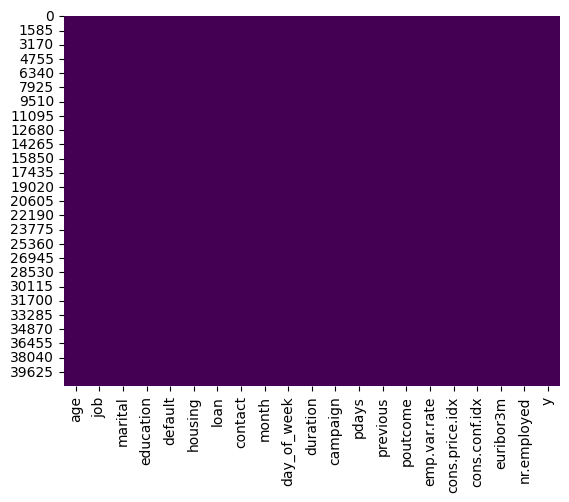

In [ ]:
#Check for Null Values
sns.heatmap(df.isnull(), cmap = "viridis", cbar = False)

In [ ]:
unique_values_dict = {}

# Iterate through columns in the DataFrame
for column in df.columns:
    # Check if the column dtype is 'object'
    if df[column].dtype == 'object':
        # Get unique values for each object column
        unique_values = df[column].unique().tolist()
        # Store unique values in the dictionary
        unique_values_dict[column] = unique_values

print(unique_values_dict)


{'job': ['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student'], 'marital': ['married', 'single', 'divorced', 'unknown'], 'education': ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate'], 'default': ['no', 'unknown', 'yes'], 'housing': ['no', 'yes', 'unknown'], 'loan': ['no', 'yes', 'unknown'], 'contact': ['telephone', 'cellular'], 'month': ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep'], 'day_of_week': ['mon', 'tue', 'wed', 'thu', 'fri'], 'poutcome': ['nonexistent', 'failure', 'success'], 'y': ['no', 'yes']}


**The color purple denotes instances of non-null data, and since purple is the only color being shown, THERE IS NO MISSING DATA**

**The High Quantity of Object datatypes shows that we're gonna have to create dummy variables at some point**

## Dummy Variable Creation

In [ ]:
df_dummy = df.copy()

# Iterate through columns in the DataFrame
for column in df.columns:
    # Check if the column dtype is 'object'
    if df[column].dtype == 'object':
        # Create dummy variables for the object column with drop_first=True
        dummy_columns = pd.get_dummies(df[column], prefix=column, drop_first=True, dtype = "float")
        # Concatenate the dummy columns to the new DataFrame
        df_dummy = pd.concat([df_dummy, dummy_columns], axis=1)
        # Drop the original object column from the new DataFrame
        df_dummy.drop(column, axis=1, inplace=True)

In [ ]:
df_dummy

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_blue-collar                41188 non-null  float64
 11  job_entrepreneur               41188 non-null  float64
 12  job_housemaid                  41188 non-null 

In [ ]:
if 999 then irrelevent

999 = month and day of the week = irrelevent (turn them into null values)

## Linear Regression Trial 1

✅ Dependent Variable: y_yes column

In [ ]:
X = df_dummy.drop("y_yes", axis=1)
y = df_dummy["y_yes"]

# Add constant to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  y_yes   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     441.3
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:50:18   Log-Likelihood:                -1886.9
No. Observations:               41188   AIC:                             3880.
Df Residuals:                   41135   BIC:                             4337.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Scoring Mechanism Building

During evaluation of the models, please use the following parameters: <br>
✅  For each incorrect prediction, the scoring mechanism would penalize the model by 3 units. <br>
✅ For each correct prediction, the scoring mechanism would reward the model by 50 units.

### Step 1: Train Test Split (Use 70% as training data)